

Column Name  :	Description / Meaning
- roll_no	: A unique identifier assigned to each student. It doesn’t affect prediction but helps differentiate records.
- gender :	The student’s gender — usually male or female. Used to analyze if performance varies by gender.
- race_ethnicity :	The ethnic background or group of the student — e.g., Group A, B, C, D, E. Helps explore performance differences among groups.
- parental_level_of_education :	The highest level of education completed by the student’s parents — e.g., high school, bachelor’s, master’s. Often correlated with student performance.
- lunch :	Indicates the type of lunch received — e.g., standard or free/reduced. Represents the student’s socioeconomic background.
- test_preparation_course :	Shows whether the student completed a test preparation course — completed or none. Usually improves scores.
- math_score :	The student’s score in the mathematics test.
- reading_score :	The student’s score in the reading test.
- writing_score :	The student’s score in the writing test.
- science_score :	The student’s score in the science test.
- total_score :	The total marks obtained by the student — typically the sum or average of all subject scores.
- grade	: The final grade assigned to the student — e.g., A, B, C, D, F (categorical) or Excellent, Good, Average, Poor. This is usually the target variable you’ll predict.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder , OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", None) 

In [32]:
data = pd.read_csv('Student_performance_10k.csv')
data.head(1)

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C


In [33]:
df = data.drop(['roll_no','total_score'], axis=1)
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,grade
0,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,C
1,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,A
2,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,B


In [34]:
df.shape

(10000, 10)

In [35]:
df.isnull().sum()

gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
grade                           3
dtype: int64

In [36]:
df.isnull().sum().sum()

np.int64(209)

In [37]:
df = df.dropna()
df.shape

(9803, 10)

In [38]:
df.describe()

,lunch,test_preparation_course,reading_score,writing_score,science_score
count,9803.000000,9803.000000,9803.000000,9803.000000,9803.000000
mean,0.644089,0.389575,70.162807,71.458227,66.085382
std,0.478813,0.487679,19.021032,18.236391,19.304727
min,0.000000,0.000000,17.000000,10.000000,9.000000
25%,0.000000,0.000000,57.000000,59.000000,53.000000
50%,1.000000,0.000000,71.000000,73.000000,67.000000
75%,1.000000,1.000000,85.000000,85.000000,81.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9803 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       9803 non-null   object 
 1   race_ethnicity               9803 non-null   object 
 2   parental_level_of_education  9803 non-null   object 
 3   lunch                        9803 non-null   float64
 4   test_preparation_course      9803 non-null   float64
 5   math_score                   9803 non-null   object 
 6   reading_score                9803 non-null   float64
 7   writing_score                9803 non-null   float64
 8   science_score                9803 non-null   float64
 9   grade                        9803 non-null   object 
dtypes: float64(5), object(5)
memory usage: 842.4+ KB


In [40]:
for i in df.columns:
    print(i , df[i].unique())
    print('-' * 50)

gender ['male' 'Boy' '\\tmale' 'female' 'Girl']
--------------------------------------------------
race_ethnicity ['group D' 'group B' 'group C' 'group E' 'group A' 'C' 'D' 'group C\\n'
 'B' 'E' 'A']
--------------------------------------------------
parental_level_of_education ['some college' 'high school' "master's degree" "associate's degree"
 "bachelor's degree" 'some high school']
--------------------------------------------------
lunch [1. 0.]
--------------------------------------------------
test_preparation_course [1. 0.]
--------------------------------------------------
math_score ['89' '65' '10' '22' '26' '40' '25' '23' '38' '39' '47' '37' '49' '72'
 '18' '11' '41' '32' '85' '78' '68' '60' '69' '87' '42' '51' '75' '20'
 '81' '98' '83' '100' '24' '71' '82' '35' '55' '19' '48' '29' '34' '74'
 '44' '28' '43' '62' '21' '93' '66' '0' '46' '13' '45' '57' '54' '70' '30'
 '97' '50' '61' '73' '88' '64' '36' '33' '76' '17' '56' '80' '53' '16'
 '58' '9' '8' '79' '12' '77' '99' '67' '5

In [41]:
df['gender'] = df['gender'].replace({'Girl':'female', 'Boy':'male', '\\tmale':'male'})
print(df['gender'].value_counts())


gender
female    4932
male      4871
Name: count, dtype: int64


In [42]:
df['race_ethnicity'] = df['race_ethnicity'].replace({
    'D': 'group D', 'C': 'group C',
    'A': 'group A', 'B': 'group B',
    'E': 'group E', 'group C\\n': 'group C'
})


In [43]:
df['math_score'] = df['math_score'].replace({'\\t41': 41})
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')


In [44]:
for col in df.columns:
    print(col , df[col].value_counts())
    print('-' * 50)

gender gender
female    4932
male      4871
Name: count, dtype: int64
--------------------------------------------------
race_ethnicity race_ethnicity
group C    2865
group D    2533
group B    1872
group E    1491
group A    1042
Name: count, dtype: int64
--------------------------------------------------
parental_level_of_education parental_level_of_education
some college          2232
high school           1955
associate's degree    1870
some high school      1710
bachelor's degree     1337
master's degree        699
Name: count, dtype: int64
--------------------------------------------------
lunch lunch
1.0    6314
0.0    3489
Name: count, dtype: int64
--------------------------------------------------
test_preparation_course test_preparation_course
0.0    5984
1.0    3819
Name: count, dtype: int64
--------------------------------------------------
math_score math_score
27     228
58     193
100    182
64     177
51     175
      ... 
9        9
7        6
6        5
5        2
4  

In [45]:
df['grade'].value_counts()

grade
B       5554
C       2631
A        898
D        659
Fail      61
Name: count, dtype: int64

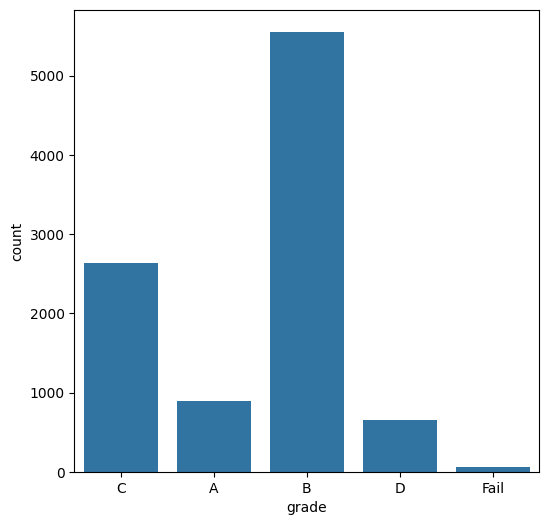

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(data=df , x='grade')
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9803 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       9803 non-null   object 
 1   race_ethnicity               9803 non-null   object 
 2   parental_level_of_education  9803 non-null   object 
 3   lunch                        9803 non-null   float64
 4   test_preparation_course      9803 non-null   float64
 5   math_score                   9803 non-null   int64  
 6   reading_score                9803 non-null   float64
 7   writing_score                9803 non-null   float64
 8   science_score                9803 non-null   float64
 9   grade                        9803 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 842.4+ KB


In [48]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,grade
0,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,C
1,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,A


In [49]:
le = LabelEncoder()

In [50]:
X = df.drop('grade', axis=1)
y = le.fit_transform(df['grade'])

In [51]:
df['parental_level_of_education'].unique()

array(['some college', 'high school', "master's degree",
       "associate's degree", "bachelor's degree", 'some high school'],
      dtype=object)

In [52]:
numerical_cols = ['math_score','reading_score','writing_score','science_score']
categorical_nominal = ['gender', 'race_ethnicity','lunch', 'test_preparation_course']
categorical_ordinal = ['parental_level_of_education']


In [53]:
education_order = [
        'some high school',
        'high school',
        'some college',
        "associate's degree",
        "bachelor's degree",
        "master's degree"]

preprocessing = ColumnTransformer([
    ('ord' , OrdinalEncoder(categories=[education_order]), categorical_ordinal),
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_nominal)
])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [55]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier()
}

In [56]:
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessing),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")

LogisticRegression: 0.9862
DecisionTreeClassifier: 0.8567
RandomForestClassifier: 0.8919
GradientBoostingClassifier: 0.9204
SVC: 0.9694
KNeighborsClassifier: 0.8373
XGBClassifier: 0.9470


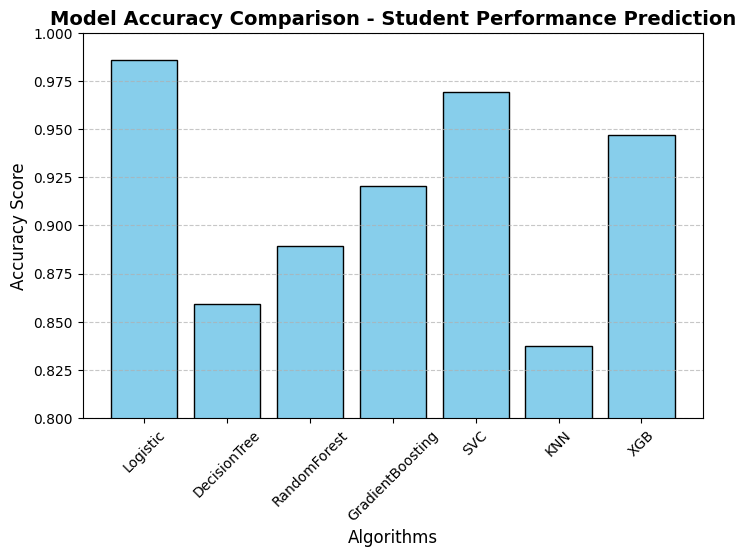

In [57]:
models = ['Logistic', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'SVC', 'KNN', 'XGB']
accuracy = [0.9862, 0.8593, 0.8893, 0.9204, 0.9694, 0.8373, 0.9470]

plt.figure(figsize=(8,5))
plt.bar(models, accuracy, color='skyblue', edgecolor='black')
plt.title("Model Accuracy Comparison - Student Performance Prediction", fontsize=14, fontweight='bold')
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0.8, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [58]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Score after Cross Validation : {scores.mean()}")


Accuracy Score: 0.98419173890872
Confusion Matrix:
 [[ 185    9    0    0    0]
 [   2 1099    2    0    0]
 [   0    3  507    2    0]
 [   0    0    9  129    0]
 [   0    0    0    4   10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       194
           1       0.99      1.00      0.99      1103
           2       0.98      0.99      0.98       512
           3       0.96      0.93      0.95       138
           4       1.00      0.71      0.83        14

    accuracy                           0.98      1961
   macro avg       0.98      0.92      0.95      1961
weighted avg       0.98      0.98      0.98      1961

Score after Cross Validation : 0.9763322544724163


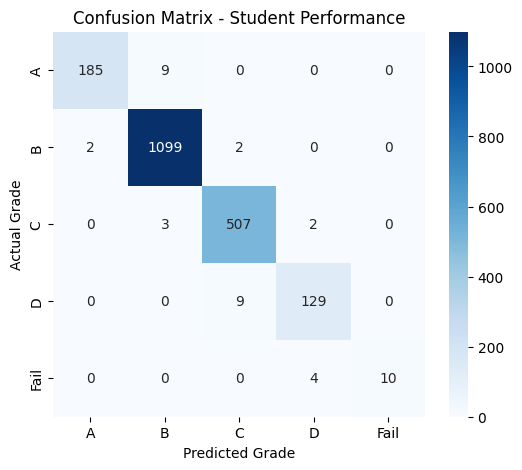

In [59]:
labels = ['A', 'B', 'C', 'D', 'Fail']
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Grade")
plt.ylabel("Actual Grade")
plt.title("Confusion Matrix - Student Performance")
plt.show()

In [60]:
import joblib

# Save the trained pipeline
joblib.dump(pipeline, 'student_performance_model.pkl')
print("✅ Model saved successfully!")

✅ Model saved successfully!
